<a href="https://colab.research.google.com/github/camilocaquimbo/colab/blob/master/Curso_de_Intro_a_ML_Platzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 .Intro
___


- Sobre el Machine Learning
- Pytorch es más natural con Python que Tensorflow
. 

# 2 . Trabajando con Pythorch 
___

Import de librerías

In [ ]:
import torch
import numpy as np

import pandas as pd

## 2.1 Trabajando con tensores

---



In [ ]:
torch.__version__

'1.6.0+cu101'

In [ ]:
tensor_a = torch.ones(2, 2)
tensor_a

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
tensor_b = torch.Tensor(2, 2)
print(tensor_b)
tensor_b.uniform_(0, 1)

tensor([[1.3458e-35, 0.0000e+00],
        [3.7835e-44, 0.0000e+00]])


tensor([[0.2568, 0.9307],
        [0.7577, 0.4409]])

In [ ]:
tensor_c = torch.rand(2, 2)
tensor_c

tensor([[0.7663, 0.2625],
        [0.9794, 0.2286]])

In [ ]:
result = tensor_b + tensor_c
result

tensor([[1.0232, 1.1932],
        [1.7371, 0.6695]])

In [ ]:
result.shape
reshaped = result.view(4,1)
reshaped

tensor([[1.0232],
        [1.1932],
        [1.7371],
        [0.6695]])

In [ ]:
points = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(points)
points[0][1] = 2.5
print(points)
points.storage() #para almacenar 

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.0000, 2.5000],
        [3.0000, 4.0000]])


 1.0
 2.5
 3.0
 4.0
[torch.FloatStorage of size 4]

In [ ]:
points, points.stride()

(tensor([[1.0000, 2.5000],
         [3.0000, 4.0000]]), (2, 1))

In [ ]:
p_t = points.t()
p_t, p_t.stride()

(tensor([[1.0000, 3.0000],
         [2.5000, 4.0000]]), (1, 2))

In [ ]:
tensor_x = torch.tensor([1, 2, 3, 4])
#tensor_x, torch.unsqueeze(tensor_x, 0)
tensor_x, torch.unsqueeze(tensor_x, 1)



(tensor([1, 2, 3, 4]), tensor([[1],
         [2],
         [3],
         [4]]))

In [ ]:
numpyArray = np.random.randn(2,2) #NumPy para el procesamiento de números 

from_numpy = torch.from_numpy(numpyArray)
from_numpy


tensor([[-0.2102,  1.3579],
        [-1.0199, -0.1295]], dtype=torch.float64)

## 2.2 Representar datos con tensores

---



In [ ]:
print(from_numpy)
print(torch.mean(from_numpy))
print(torch.mean(from_numpy, dim=0))
print(torch.mean(from_numpy, dim=1))

tensor([[-0.2102,  1.3579],
        [-1.0199, -0.1295]], dtype=torch.float64)
tensor(-0.0004, dtype=torch.float64)
tensor([-0.6150,  0.6142], dtype=torch.float64)
tensor([ 0.5739, -0.5747], dtype=torch.float64)


In [ ]:
torch.std(from_numpy, dim=1) #Evaluar desviación estándar 

tensor([1.1088, 0.6296], dtype=torch.float64)

In [ ]:
torch.save(from_numpy, 'tensor.t')

In [ ]:
load = torch.load('tensor.t')
load

tensor([[-0.2102,  1.3579],
        [-1.0199, -0.1295]], dtype=torch.float64)

In [ ]:
url = "https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/2019/data.csv"
dataframe = pd.read_csv(url) 
#leído con Pandas
dataframe

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [ ]:
dataframe.columns #ver todas la columnas

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
subset = dataframe[['Overall','Age','International Reputation', 'Weak Foot',
       'Skill Moves' ]].dropna(axis=0, how='any') 
       
#escoger solo algunas columnas

columns = subset.columns[1:]
players = torch.tensor(subset.values).float()
players.shape, players.type()

(torch.Size([18159, 5]), 'torch.FloatTensor')

In [ ]:
data = players[:, 1:]
data, data.shape

(tensor([[31.,  5.,  4.,  4.],
         [33.,  5.,  4.,  5.],
         [26.,  5.,  5.,  5.],
         ...,
         [16.,  1.,  3.,  2.],
         [17.,  1.,  3.,  2.],
         [16.,  1.,  3.,  2.]]), torch.Size([18159, 4]))

In [ ]:
target = players[:, 0]
target, target.shape

(tensor([94., 94., 92.,  ..., 47., 47., 46.]), torch.Size([18159]))

In [ ]:
mean = torch.mean(data, dim=0)
mean

tensor([25.1225,  1.1132,  2.9473,  2.3613])

In [ ]:
std = torch.std(data, dim=0)
std

tensor([4.6706, 0.3940, 0.6605, 0.7562])

In [ ]:
norm = (data - mean)/torch.sqrt(std) #normalización de los datos
norm

tensor([[ 2.7196,  6.1919,  1.2953,  1.8845],
        [ 3.6450,  6.1919,  1.2953,  3.0345],
        [ 0.4060,  6.1919,  2.5258,  3.0345],
        ...,
        [-4.2211, -0.1804,  0.0648, -0.4155],
        [-3.7584, -0.1804,  0.0648, -0.4155],
        [-4.2211, -0.1804,  0.0648, -0.4155]])

In [ ]:
good = data[torch.ge(target, 85)]
average = data[torch.gt(target, 70) & torch.lt(target, 85)] #rango de los jugadores buenos
notSoGood = data[torch.le(target, 70)] 

goodMean = torch.mean(good, dim=0) #media
averageMean = torch.mean(average, dim=0) #mediapromedio
notSoGoodMean = torch.mean(notSoGood, dim=0)

# goodMean, averageMean, notSoGoodMean

for i, args in enumerate(zip(columns, goodMean, averageMean, notSoGoodMean)):
  print('{:25} {:6.2f} {:6.2f} {:6.2f}'.format(*args))

Age                        28.35  27.23  24.37
International Reputation    3.38   1.36   1.01
Weak Foot                   3.45   3.11   2.89
Skill Moves                 3.04   2.75   2.22


# 3 . Implementaciones de algoritmos de Machine Learning en Pytorch
___

In [ ]:
#librerías 
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

## 3.1 *Regresión* Lineal
___

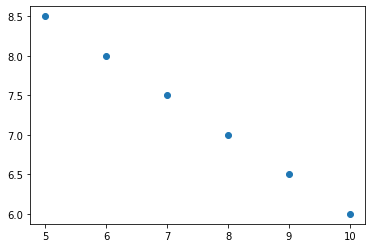

In [ ]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [ ]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

prices_array #convertido a Numpy

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape #requiriendo los gradientes

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.01540860440582037


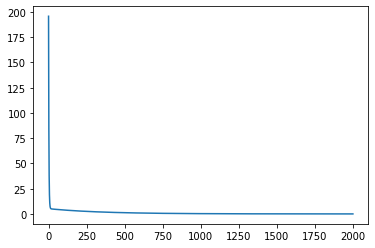

In [ ]:
model = nn.Linear(1, 1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015) #optimizador con el lr (learning rate)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [ ]:
x = torch.Tensor([[14.0]])
p = model(x)
p

tensor([[4.4333]], grad_fn=<AddmmBackward>)

## 3.2 Regresión Logística
___

In [ ]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 0.52429488, -1.78217078],
       [-3.57164434, -6.84878626],
       [-4.32435761, -2.77139925],
       [ 0.69457286, -1.68850075],
       [ 3.32978116, -4.84625345],
       [-1.61760709, -1.16020345],
       [ 0.67050525,  7.35838851],
       [-1.1347182 , -2.22262034],
       [ 1.53393182, -1.22958227],
       [-0.75454255, -0.09469007],
       [-2.40444351,  4.0874243 ],
       [ 0.70810722, -1.80515787],
       [ 1.57134698,  1.23457237],
       [-3.73034164,  1.21047185],
       [ 0.82425222,  0.42502981],
       [ 6.46574244, -3.43557457],
       [-5.83107934, -4.07083113],
       [ 1.00377075,  0.15840386],
       [ 5.83693942,  2.3663498 ],
       [ 2.79336705, -0.97743783],
       [ 5.50968947,  0.20672466],
       [ 1.0662435 ,  2.14641946],
       [-6.14037068,  0.87704308],
       [ 4.33596234, -1.30804548],
       [ 0.83183235, -4.05917132],
       [-1.98554764, -5.36750805],
       [ 2.61097489,  1.09757475],
       [ 2.89084502, -6.12990578],
       [ 1.09796585,

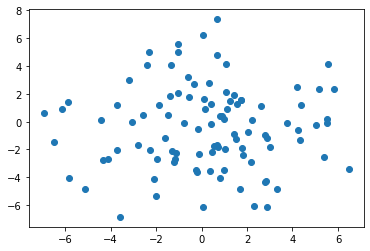

In [ ]:
plt.scatter(data[:,0], data[:,1])

In [ ]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [ ]:
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen))

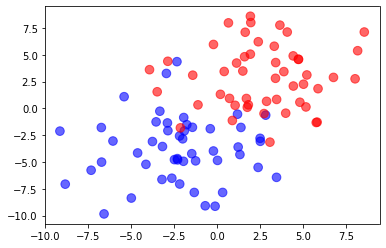

In [ ]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [ ]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1830, grad_fn=<BinaryCrossEntropyBackward>)

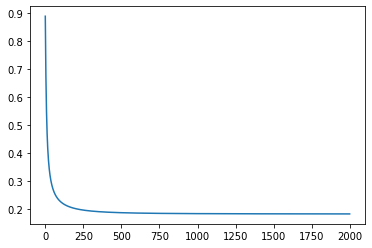

In [ ]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [ ]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


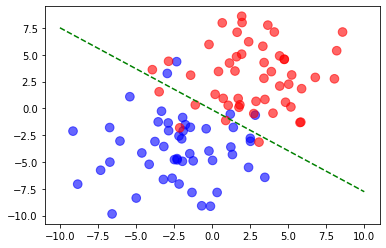

In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n) #línea separadora
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')

# 4 . Redes Neurales y reconocimiento de imágenes
___

Deep learning es aprendizaje con múltiples capas ocultas: 

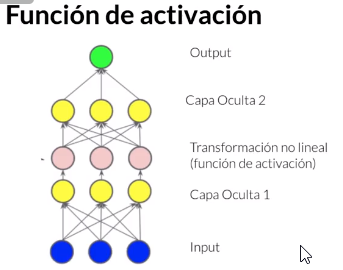

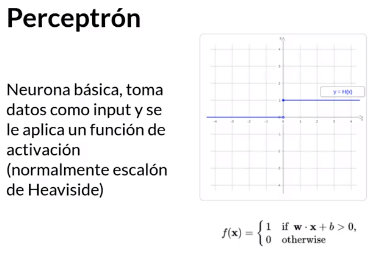

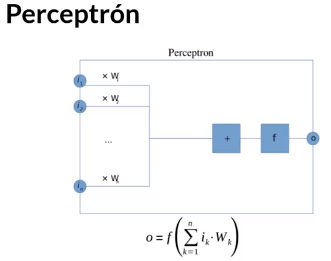

In [ ]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image # para leer la imagen
import urllib.request as request # para traer la imagen
from matplotlib import pyplot as plt

## 4.1 Modelo pre-entrenado

---



In [ ]:
inception = models.inception_v3(pretrained=True)

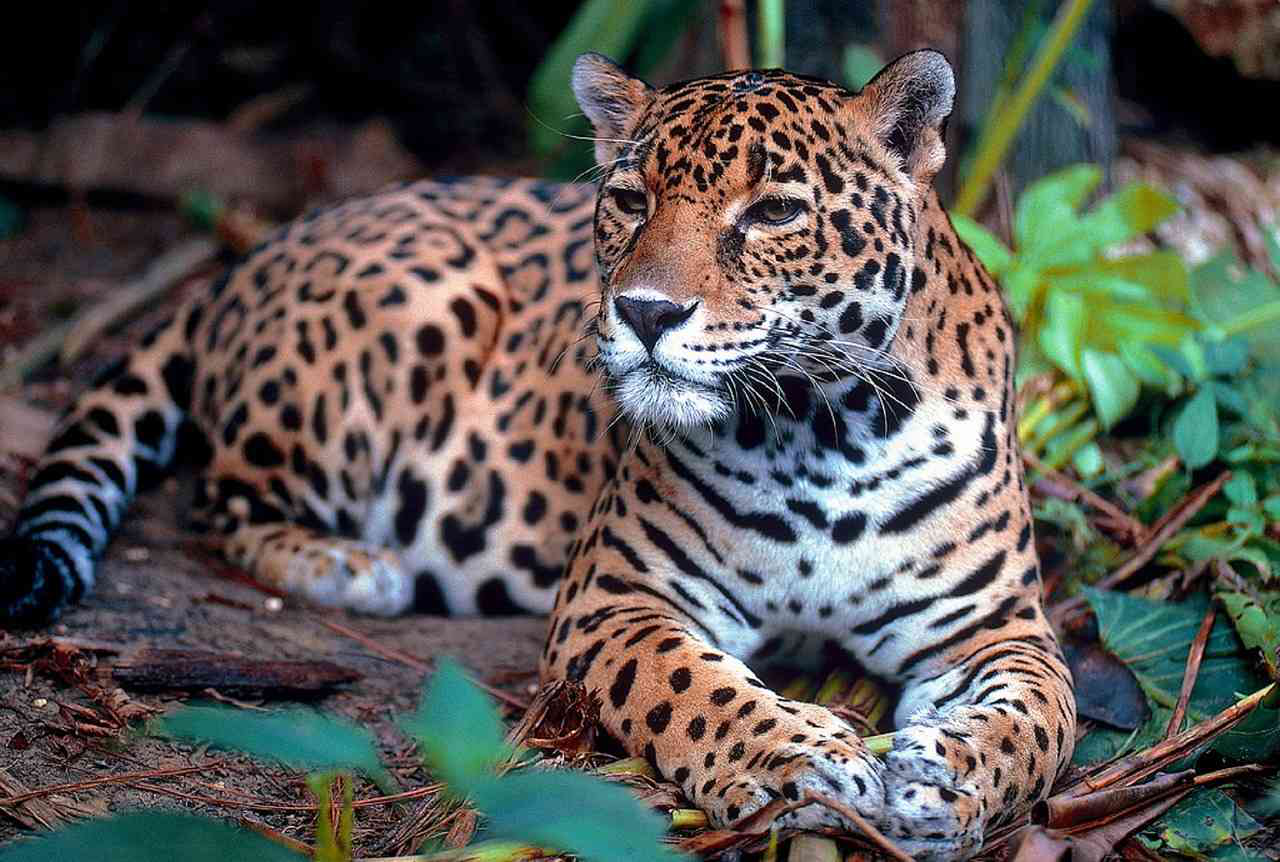

In [ ]:
url = 'https://static.iris.net.co/sostenibilidad/upload/images/2019/2/20/43051_1.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


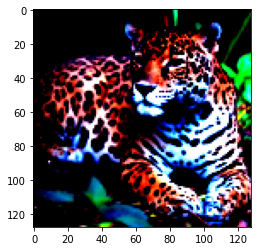

In [ ]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
out = inception(batch)
out

tensor([[-1.9298e-01, -2.9606e-02,  3.5547e-01, -1.2459e+00, -3.2230e+00,
         -2.9298e+00, -3.6335e+00,  1.4311e+00,  4.5108e+00, -3.4745e+00,
          5.2219e+00, -1.2182e+00, -2.7863e+00, -7.0940e-01,  1.0220e+00,
         -7.8187e-01,  2.7211e+00,  4.6929e-01, -5.1414e+00, -8.3194e-01,
         -4.0980e+00, -3.3592e+00, -5.1152e+00, -2.0389e+00, -1.7834e+00,
         -3.5719e+00, -1.3095e+00, -5.4593e+00, -4.6882e-01, -1.0905e-01,
          3.2654e-01,  1.8200e+00,  3.6861e+00,  2.3782e+00,  6.5483e-01,
         -2.3833e+00,  8.7482e+00, -4.4629e-01,  3.8611e+00,  2.9318e-01,
         -1.6872e+00,  1.4691e+00, -3.3154e+00,  1.1411e+00, -3.6009e+00,
          5.2169e-01,  1.9585e+00,  1.8910e+00,  1.0974e+00,  2.4542e+00,
         -3.1400e+00,  5.8614e-01, -7.0043e+00, -2.9538e+00, -5.1877e-01,
         -1.5132e-02, -3.8815e+00, -5.0717e+00, -3.7270e+00,  1.6791e+00,
         -1.2248e+00,  1.8153e+00, -1.3199e+00,  2.4035e+00, -1.2959e+00,
          3.4926e+00, -7.7509e+00,  1.

In [ ]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
out

tensor([[-1.9298e-01, -2.9606e-02,  3.5547e-01, -1.2459e+00, -3.2230e+00,
         -2.9298e+00, -3.6335e+00,  1.4311e+00,  4.5108e+00, -3.4745e+00,
          5.2219e+00, -1.2182e+00, -2.7863e+00, -7.0940e-01,  1.0220e+00,
         -7.8187e-01,  2.7211e+00,  4.6929e-01, -5.1414e+00, -8.3194e-01,
         -4.0980e+00, -3.3592e+00, -5.1152e+00, -2.0389e+00, -1.7834e+00,
         -3.5719e+00, -1.3095e+00, -5.4593e+00, -4.6882e-01, -1.0905e-01,
          3.2654e-01,  1.8200e+00,  3.6861e+00,  2.3782e+00,  6.5483e-01,
         -2.3833e+00,  8.7482e+00, -4.4629e-01,  3.8611e+00,  2.9318e-01,
         -1.6872e+00,  1.4691e+00, -3.3154e+00,  1.1411e+00, -3.6009e+00,
          5.2169e-01,  1.9585e+00,  1.8910e+00,  1.0974e+00,  2.4542e+00,
         -3.1400e+00,  5.8614e-01, -7.0043e+00, -2.9538e+00, -5.1877e-01,
         -1.5132e-02, -3.8815e+00, -5.0717e+00, -3.7270e+00,  1.6791e+00,
         -1.2248e+00,  1.8153e+00, -1.3199e+00,  2.4035e+00, -1.2959e+00,
          3.4926e+00, -7.7509e+00,  1.

In [ ]:
_, index = torch.max(out, 1)

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item() #se obtiene que es una pantera con un 98% de confiabilidad

('jaguar, panther, Panthera onca, Felis onca', 98.94794464111328)

In [ ]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

# se obtienen los 5 más similares, jaguar sique teniendo el mayor % de confiabilidad

jaguar, panther, Panthera onca, Felis onca 98.94794464111328
leopard, Panthera pardus 1.0520575046539307
cheetah, chetah, Acinonyx jubatus 3.236995667066367e-07
snow leopard, ounce, Panthera uncia 6.6328912848301336e-12
banjo 2.1025255104653584e-13


## 4.2 Trabajando con un dataset

---



In [ ]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True) #descargar dataset CIFAR10
validation_set = datasets.CIFAR10(data_path, train=False, download=True) #datos de validación

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [ ]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


In [ ]:
len(dataset) #tiene 50k imágenes diferentes

50000

In [ ]:
img, label = dataset[500]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7626AB8128>, 5, 'dog')

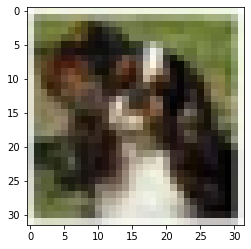

In [ ]:
plt.imshow(img)

In [ ]:
tensor_transform = transforms.ToTensor() #convertir la imagen en un tensor 

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7626AB8128>,
 tensor([[[0.9765, 0.9412, 0.9373,  ..., 0.9333, 0.9373, 0.9843],
          [0.8863, 0.5922, 0.5569,  ..., 0.6235, 0.7137, 0.9529],
          [0.8471, 0.4627, 0.4235,  ..., 0.4196, 0.5725, 0.9412],
          ...,
          [0.8588, 0.4510, 0.3961,  ..., 0.0000, 0.2235, 0.9294],
          [0.8784, 0.5255, 0.4314,  ..., 0.0824, 0.3098, 0.9216],
          [0.9569, 0.8784, 0.8471,  ..., 0.7608, 0.8039, 0.9765]],
 
         [[0.9725, 0.9412, 0.9451,  ..., 0.9647, 0.9647, 0.9961],
          [0.8980, 0.6118, 0.5882,  ..., 0.6745, 0.7490, 0.9725],
          [0.8745, 0.5020, 0.4667,  ..., 0.4784, 0.6157, 0.9647],
          ...,
          [0.8745, 0.4745, 0.4314,  ..., 0.0000, 0.2235, 0.9294],
          [0.8902, 0.5451, 0.4588,  ..., 0.0784, 0.3098, 0.9216],
          [0.9608, 0.8902, 0.8627,  ..., 0.7529, 0.8039, 0.9765]],
 
         [[0.9647, 0.8863, 0.8549,  ..., 0.8745, 0.9020, 0.9882],
          [0.8471, 0.5059, 0.4275,  ..., 0

In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor()) 
#traer el dataset con la transformación

Files already downloaded and verified


In [ ]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [ ]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

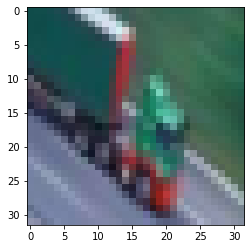

In [ ]:
plt.imshow(img.permute(1, 2, 0))

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3) #agregar las imágenes al stack para procesarlas

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform) #trae de nuevo el dataset con las transformaciones

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

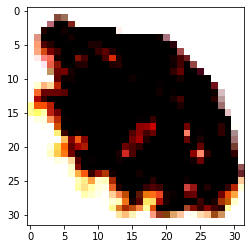

In [ ]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]

# 5 . Reconocimiento de imágenes
___

In [ ]:
import torch
import torch.nn as nn #neural networks
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
#torch.set_printoptions(edgeitems=2) #default 3
#torch.manual_seed(123)

## 5.1 Construyendo modelo
---



In [ ]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)
# cargar el dataloader de 4 en 4 imágenes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck
bird
truck
deer


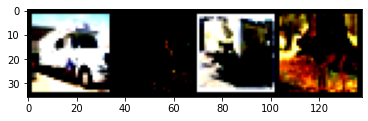

In [ ]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0)) #muestra 4 aleatorias

for i in range(size):
  print(classes[labels[i]])

In [ ]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [ ]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [ ]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))
# crea red neuronal

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [ ]:
sigmoid(x).sum()

tensor(2.5644)

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [ ]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [ ]:
softmax(x).sum()

tensor(1.)

In [ ]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

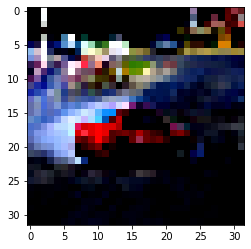

In [ ]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0)) #aplica el modelo y obtiene probabilidades sobre la imagen
out

tensor([[0.4925, 0.5075]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])
# da la clase a la que pertence según el modelo

-> car  model: cat


In [ ]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 110.0]])

softmax(x)

tensor([[0., 1.]])

In [ ]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [ ]:
log_softmax(x)

tensor([[-110.,    0.]])

In [ ]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

## 5.2 Implementando un clasificador totalmente conectado
---


In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [ ]:
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> car  model: car


tensor(0.6376, grad_fn=<NllLossBackward>)

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [ ]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

lossFunction = nn.NLLLoss()

n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
#loop de entrenamiento completo
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.334125
Epoch: 1, Loss: 0.614506
Epoch: 2, Loss: 0.290369
Epoch: 3, Loss: 0.266616
Epoch: 4, Loss: 0.258821
Epoch: 5, Loss: 0.238157
Epoch: 6, Loss: 0.241589
Epoch: 7, Loss: 0.538088
Epoch: 8, Loss: 0.266708
Epoch: 9, Loss: 0.301877
Epoch: 10, Loss: 0.175930
Epoch: 11, Loss: 0.202958
Epoch: 12, Loss: 0.466926
Epoch: 13, Loss: 0.115704
Epoch: 14, Loss: 0.288436
Epoch: 15, Loss: 0.162681
Epoch: 16, Loss: 0.107017
Epoch: 17, Loss: 0.130518
Epoch: 18, Loss: 0.082534
Epoch: 19, Loss: 0.045523
Epoch: 20, Loss: 0.057575
Epoch: 21, Loss: 0.044323
Epoch: 22, Loss: 0.073403
Epoch: 23, Loss: 0.048563
Epoch: 24, Loss: 0.059601
Epoch: 25, Loss: 0.032759
Epoch: 26, Loss: 0.029276
Epoch: 27, Loss: 0.026467
Epoch: 28, Loss: 0.019827
Epoch: 29, Loss: 0.025651
Epoch: 30, Loss: 0.025405
Epoch: 31, Loss: 0.011832
Epoch: 32, Loss: 0.017322
Epoch: 33, Loss: 0.014113
Epoch: 34, Loss: 0.011248
Epoch: 35, Loss: 0.015011
Epoch: 36, Loss: 0.023878
Epoch: 37, Loss: 0.006696
Epoch: 38, Loss: 0.033

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.864500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


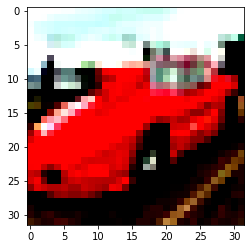

In [ ]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

## 5.3 Mejoras, limitaciones y conclusiones
---


In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.310420
Epoch: 1, Loss: 0.483998
Epoch: 2, Loss: 0.331265
Epoch: 3, Loss: 0.374413
Epoch: 4, Loss: 0.304695
Epoch: 5, Loss: 0.258078
Epoch: 6, Loss: 0.352562
Epoch: 7, Loss: 0.500097
Epoch: 8, Loss: 0.600972
Epoch: 9, Loss: 0.196345
Epoch: 10, Loss: 0.465754
Epoch: 11, Loss: 0.367428
Epoch: 12, Loss: 0.227408
Epoch: 13, Loss: 0.209280
Epoch: 14, Loss: 0.762420
Epoch: 15, Loss: 0.330336
Epoch: 16, Loss: 0.132580
Epoch: 17, Loss: 0.155979
Epoch: 18, Loss: 0.247939
Epoch: 19, Loss: 0.155995
Epoch: 20, Loss: 0.146939
Epoch: 21, Loss: 0.026372
Epoch: 22, Loss: 0.050233
Epoch: 23, Loss: 0.189604
Epoch: 24, Loss: 0.234853
Epoch: 25, Loss: 0.075702
Epoch: 26, Loss: 0.176250
Epoch: 27, Loss: 0.096315
Epoch: 28, Loss: 0.047305
Epoch: 29, Loss: 0.012624
Epoch: 30, Loss: 0.039102
Epoch: 31, Loss: 0.014415
Epoch: 32, Loss: 1.357340
Epoch: 33, Loss: 0.031234
Epoch: 34, Loss: 0.006131
Epoch: 35, Loss: 0.019468
Epoch: 36, Loss: 0.006107
Epoch: 37, Loss: 3.431402
Epoch: 38, Loss: 0.007

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.860500


In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct:  car  model: cat


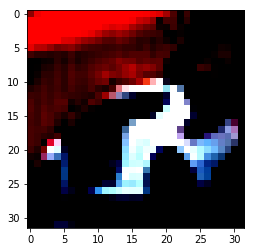

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [ ]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

# 6 . Collab con Scikit
___

In [ ]:
from sklearn.datasets import load_iris #librería especializada en flores de la familia iris
from sklearn.ensemble import RandomForestClassifier

import pandas as pd #datos
import numpy as np #números

In [ ]:
np.random.seed(0)

![irises](http://i.imgur.com/RcxYYBA.png)
irismeasures



- Otros datasets https://scikit-learn.org/stable/datasets/index.html
- https://riptutorial.com/es/scikit-learn/example/6801/conjuntos-de-datos-de-muestra

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) #cargar el dataframe

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) #agrega la columna de especie
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
trainRandom = np.random.rand(len(df)) < 0.8 #deja 80% de datos de entrenamiento y 20% de datos de validación 

In [ ]:
train = df[trainRandom]

In [ ]:
test = df[~trainRandom] #tomar el sobrante

In [ ]:
print('Number of observations in the training set:', len(train))
print('Number of observations in the test set:', len(test))
#imprime los datos de cada set

Number of observations in the training set: 123
Number of observations in the test set: 27


In [ ]:
features = df.columns[:4] #las 1ras 4 columnas van a ser los features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# cambiando nombres columnas -m strings a números
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#clasificador
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
#Entrenando con Scikit, con los datos en y
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Predicción
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [ ]:
predictions = iris.target_names[clf.predict(test[features])]
#predictions
predictions[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
test['species'].head()

7     setosa
8     setosa
13    setosa
17    setosa
19    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [ ]:
# Matriz de confusiones con pandas, en la diagonal muestra los resultados
pd.crosstab(test['species'], predictions, rownames=['Actual species'], colnames=['Predicted species'])

Predicted species,setosa,versicolor,virginica
Actual species,,,
setosa,8,0,0
versicolor,0,5,2
virginica,0,0,12


In [ ]:
# Pesos de cada una de las características
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.0889479467793623),
 ('sepal width (cm)', 0.0234427551884027),
 ('petal length (cm)', 0.44105878808840404),
 ('petal width (cm)', 0.44655050994383105)]

# 7 . Algoritmos más usados en Machine Learning
___


3 tipos principales: 

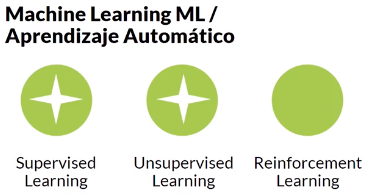

## ML Supervisado

Con etiquetas que marcan los datos.

  - Regresión: Predicciones de comportamiento, mercado, clima, etc.
  - Clasificación: Diagnósticos, de salud, de mercado, de imágenes

### Algoritmos:
- Regresión lineal 
- Regresión logística 
- Naive Bayes
- K-nearest Neighbors
- Decision Trees
- Random Forest

## No supervisado

Detecta patrones y agrupa datos. 

### Algoritmos 

- Clusters - Agrupamiento: agrupa datos con características en común. ejemplo: segmentación de mercados, sistemas de recomendaciones.

- Reducción de dimensionalidad: Se usa en visualización Big Data y descubrimiento de estructuras.

- K-means: Segmentación en K grupos de datos comunes.


## Reinforcement Learning

Aprendizaje por refuerzo: Se da un objetivo para que aprenda 

# 8 . Redes neuronales y herramientas
---

- https://playground.tensorflow.org/ 

- 3D - https://www.cs.ryerson.ca/~aharley/vis/conv/ 

- 2D - https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

